In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import cv2

In [2]:
import os

# ✅ Fixed Dataset Path (hardcoded, escaped properly)
DATASET_PATH = r"Plant"

# ✅ Check if train/test folders exist
assert os.path.exists(DATASET_PATH + "/train"), "❌ Train folder not found at the given path!"
assert os.path.exists(DATASET_PATH + "/test"), "❌ Test folder not found at the given path!"


In [3]:
IMG_SIZE = 128
BATCH_SIZE = 32

# ✅ Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load images
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
validation_generator = val_datagen.flow_from_directory(
    DATASET_PATH + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ✅ Number of classes
num_classes = train_generator.num_classes


Found 19337 images belonging to 17 classes.
Found 4825 images belonging to 17 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# ✅ Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

c:\Users\Pranshu Agrahari\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │        25,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,367,561 (9.03 MB)

 Trainable params: 2,365,577 (9.02 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [5]:
import math
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25
)

Epoch 1/25


c:\Users\Pranshu Agrahari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


605/605 ━━━━━━━━━━━━━━━━━━━━ 527s 853ms/step - accuracy: 0.5874 - loss: 1.2992 - val_accuracy: 0.6145 - val_loss: 1.3354
Epoch 2/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 376s 620ms/step - accuracy: 0.8139 - loss: 0.5459 - val_accuracy: 0.7235 - val_loss: 1.2849
Epoch 3/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 473s 779ms/step - accuracy: 0.8689 - loss: 0.3925 - val_accuracy: 0.8265 - val_loss: 0.6660
Epoch 4/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 318s 524ms/step - accuracy: 0.8929 - loss: 0.3093 - val_accuracy: 0.7822 - val_loss: 0.8695
Epoch 5/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 313s 515ms/step - accuracy: 0.9124 - loss: 0.2534 - val_accuracy: 0.8075 - val_loss: 0.7164
Epoch 6/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 301s 496ms/step - accuracy: 0.9190 - loss: 0.2334 - val_accuracy: 0.8220 - val_loss: 0.7964
Epoch 7/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 340s 560ms/step - accuracy: 0.9279 - loss: 0.2031 - val_accuracy: 0.7954 - val_loss: 0.8164
Epoch 8/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 340s 559ms/step - accuracy: 0.9351 - loss: 0.18

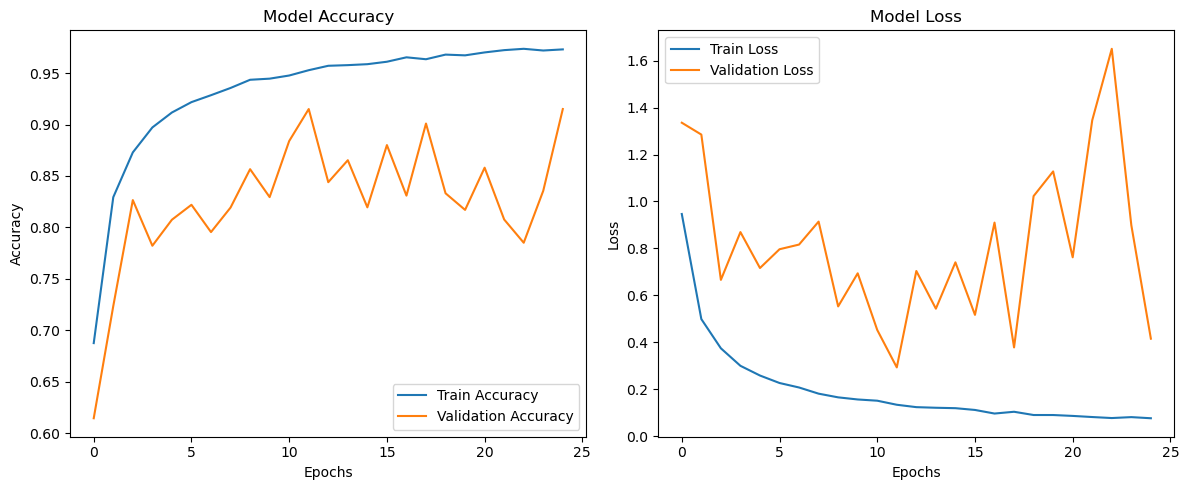

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
test_loss, test_acc = model.evaluate(validation_generator)
print("Test Accuracy:", test_acc)

151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.9124 - loss: 0.3957
Test Accuracy: 0.9150258898735046


In [8]:
model.save("Best_Plant.h5")